In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

pd.set_option("display.max_rows", None)

In [2]:
dateDF = pd.read_excel("DSP_Data_with_Butas and date.xlsx", "Sheet1", skiprows=0, nrows= 1350, usecols="A")
humiDF = pd.read_excel("DSP_Data_with_Butas and date.xlsx", "Sheet1", skiprows=0, nrows= 1350, usecols="B")
tempDF = pd.read_excel("DSP_Data_with_Butas and date.xlsx", "Sheet1", skiprows=0, nrows= 1350, usecols="C")

dateDF['Date'] = dateDF['Date']
humiDF['Humidity (%)'] = humiDF['Humidity (%)'].interpolate()
tempDF['Temperature (°C)'] = tempDF['Temperature (°C)'].interpolate()

datetemphumiDF = pd.DataFrame()
datetemphumiDF = pd.concat([dateDF, humiDF, tempDF], axis=1)

# dateDF
# humiDF
# tempDF
# datetemphumiDF

### FILTER TARGET HOURS

In [11]:
indexesOf5AMTo6AM = []
indexesOf1PMTo2PM = []
indexesOf10PMTo11PM = []

targets = ['05', '06', '13', '14', '22', '23']
    
for i in range(len(datetemphumiDF)):
    dateTimeSplit = datetemphumiDF['Date'][i].split('_')

    timeSplit = dateTimeSplit[1].split(':')
    hour = timeSplit[0]
    
    if hour in targets:
        if hour == '05'or hour == '06':
            indexesOf5AMTo6AM.append(i)
        if hour == '13' or hour == '14':
            indexesOf1PMTo2PM.append(i)
        if hour == '22' or hour == '23':
            indexesOf10PMTo11PM.append(i)
            
# print(indexesOf5AMTo6AM)

# print(indexesOf1PMTo2PM)

# print(indexesOf10PMTo11PM)

### Functions for Filtering Data and for Plotting of Filtered Data

In [4]:
def getFilteredData(indexesOfTargets, datetemphumiDF):
    indexesOfTargetsPerDay = []
    tempOfTargetsPerDay = []
    humiOfTargetsPerDay = []
    datesOfTargets = []
    minutesOfTargets = []

    tempList = []
    temperatures = []
    humidity = []
    datesList = []
    prevDate = None

    lastIndexFromIndexesOfTargets= indexesOfTargets[-1]
    lastElement = datetemphumiDF['Date'][lastIndexFromIndexesOfTargets]
    
    minutesList = []

    for indx in indexesOfTargets:
        dateTimeSplit = datetemphumiDF['Date'][indx].split('_')
        dateSplit = dateTimeSplit[0].split('/')
        date = dateSplit[1]
        datetimeFromDF = dateDF['Date'][indx]
        timeSplit = dateTimeSplit[1].split(':')
        time = timeSplit[1] + ":" + timeSplit[2]
        
        if (date != prevDate and prevDate != None) or datetimeFromDF == lastElement:
            indexesOfTargetsPerDay.append(tempList)
            tempOfTargetsPerDay.append(temperatures)
            humiOfTargetsPerDay.append(humidity)
            datesOfTargets.append(datesList)
            minutesOfTargets.append(minutesList)
            
            tempList = []
            temperatures = []
            humidity = []
            datesList = []
            minutesList = []
        
        tempList.append(indx)
        temperatures.append(datetemphumiDF['Temperature (°C)'][indx])
        humidity.append(datetemphumiDF['Humidity (%)'][indx])
        datesList.append(datetimeFromDF)
        minutesList.append(time)
        
        prevDate = date
        
    return zip(tempOfTargetsPerDay, datesOfTargets, minutesOfTargets)
    
def plotFilteredData(title, filteredData):
    plt.figure(figsize=(25,5), dpi=900, layout='tight')

    plt.title(title)
    plt.ylabel("TEMPERATURE")
    plt.xlabel("DATE AND TIME")

    for item, date, minutes in filteredData:
        dateLabel = date[0].split('/')[1]
        plt.scatter(date, item, label=f'Oct{dateLabel}')

    plt.setp(plt.xticks(fontsize=7))
    plt.gcf().autofmt_xdate()
    plt.legend()
    plt.grid()
    plt.show()

def plotFilteredDataPerDay(title, filteredData):
    position = 1
    
    plt.figure(figsize=(30, 25))

    for item, date, minutes in filteredData:
        colorsOfDay = ['blue', 'blue', 'blue', 'blue', 'red', 'red', 'red', 'red']
        
        if len(minutes) < 8:
            colorsOfDay = ['blue', 'blue', 'blue', 'blue', 'red', 'red', 'red']
            
        plt.subplot(4, 4, position)
        plt.scatter(minutes, item, color=colorsOfDay)
        plt.title(date[0].split('_')[0])
        position += 1
    
        plt.ylabel("Temperature")
        plt.xlabel("Minutes")
        plt.grid()
        
    titleSplit = title.split(' ')
    colorsForText = ['blue', 'black', 'red']
    x = 0.43
    
    for word, color in zip(titleSplit, colorsForText):
        plt.text(x, 0.90, word, fontsize=50, color=color, transform=plt.gcf().transFigure)
        x += len(word) / 50
    
    plt.show()

### FILTER 5AM TO 6AM

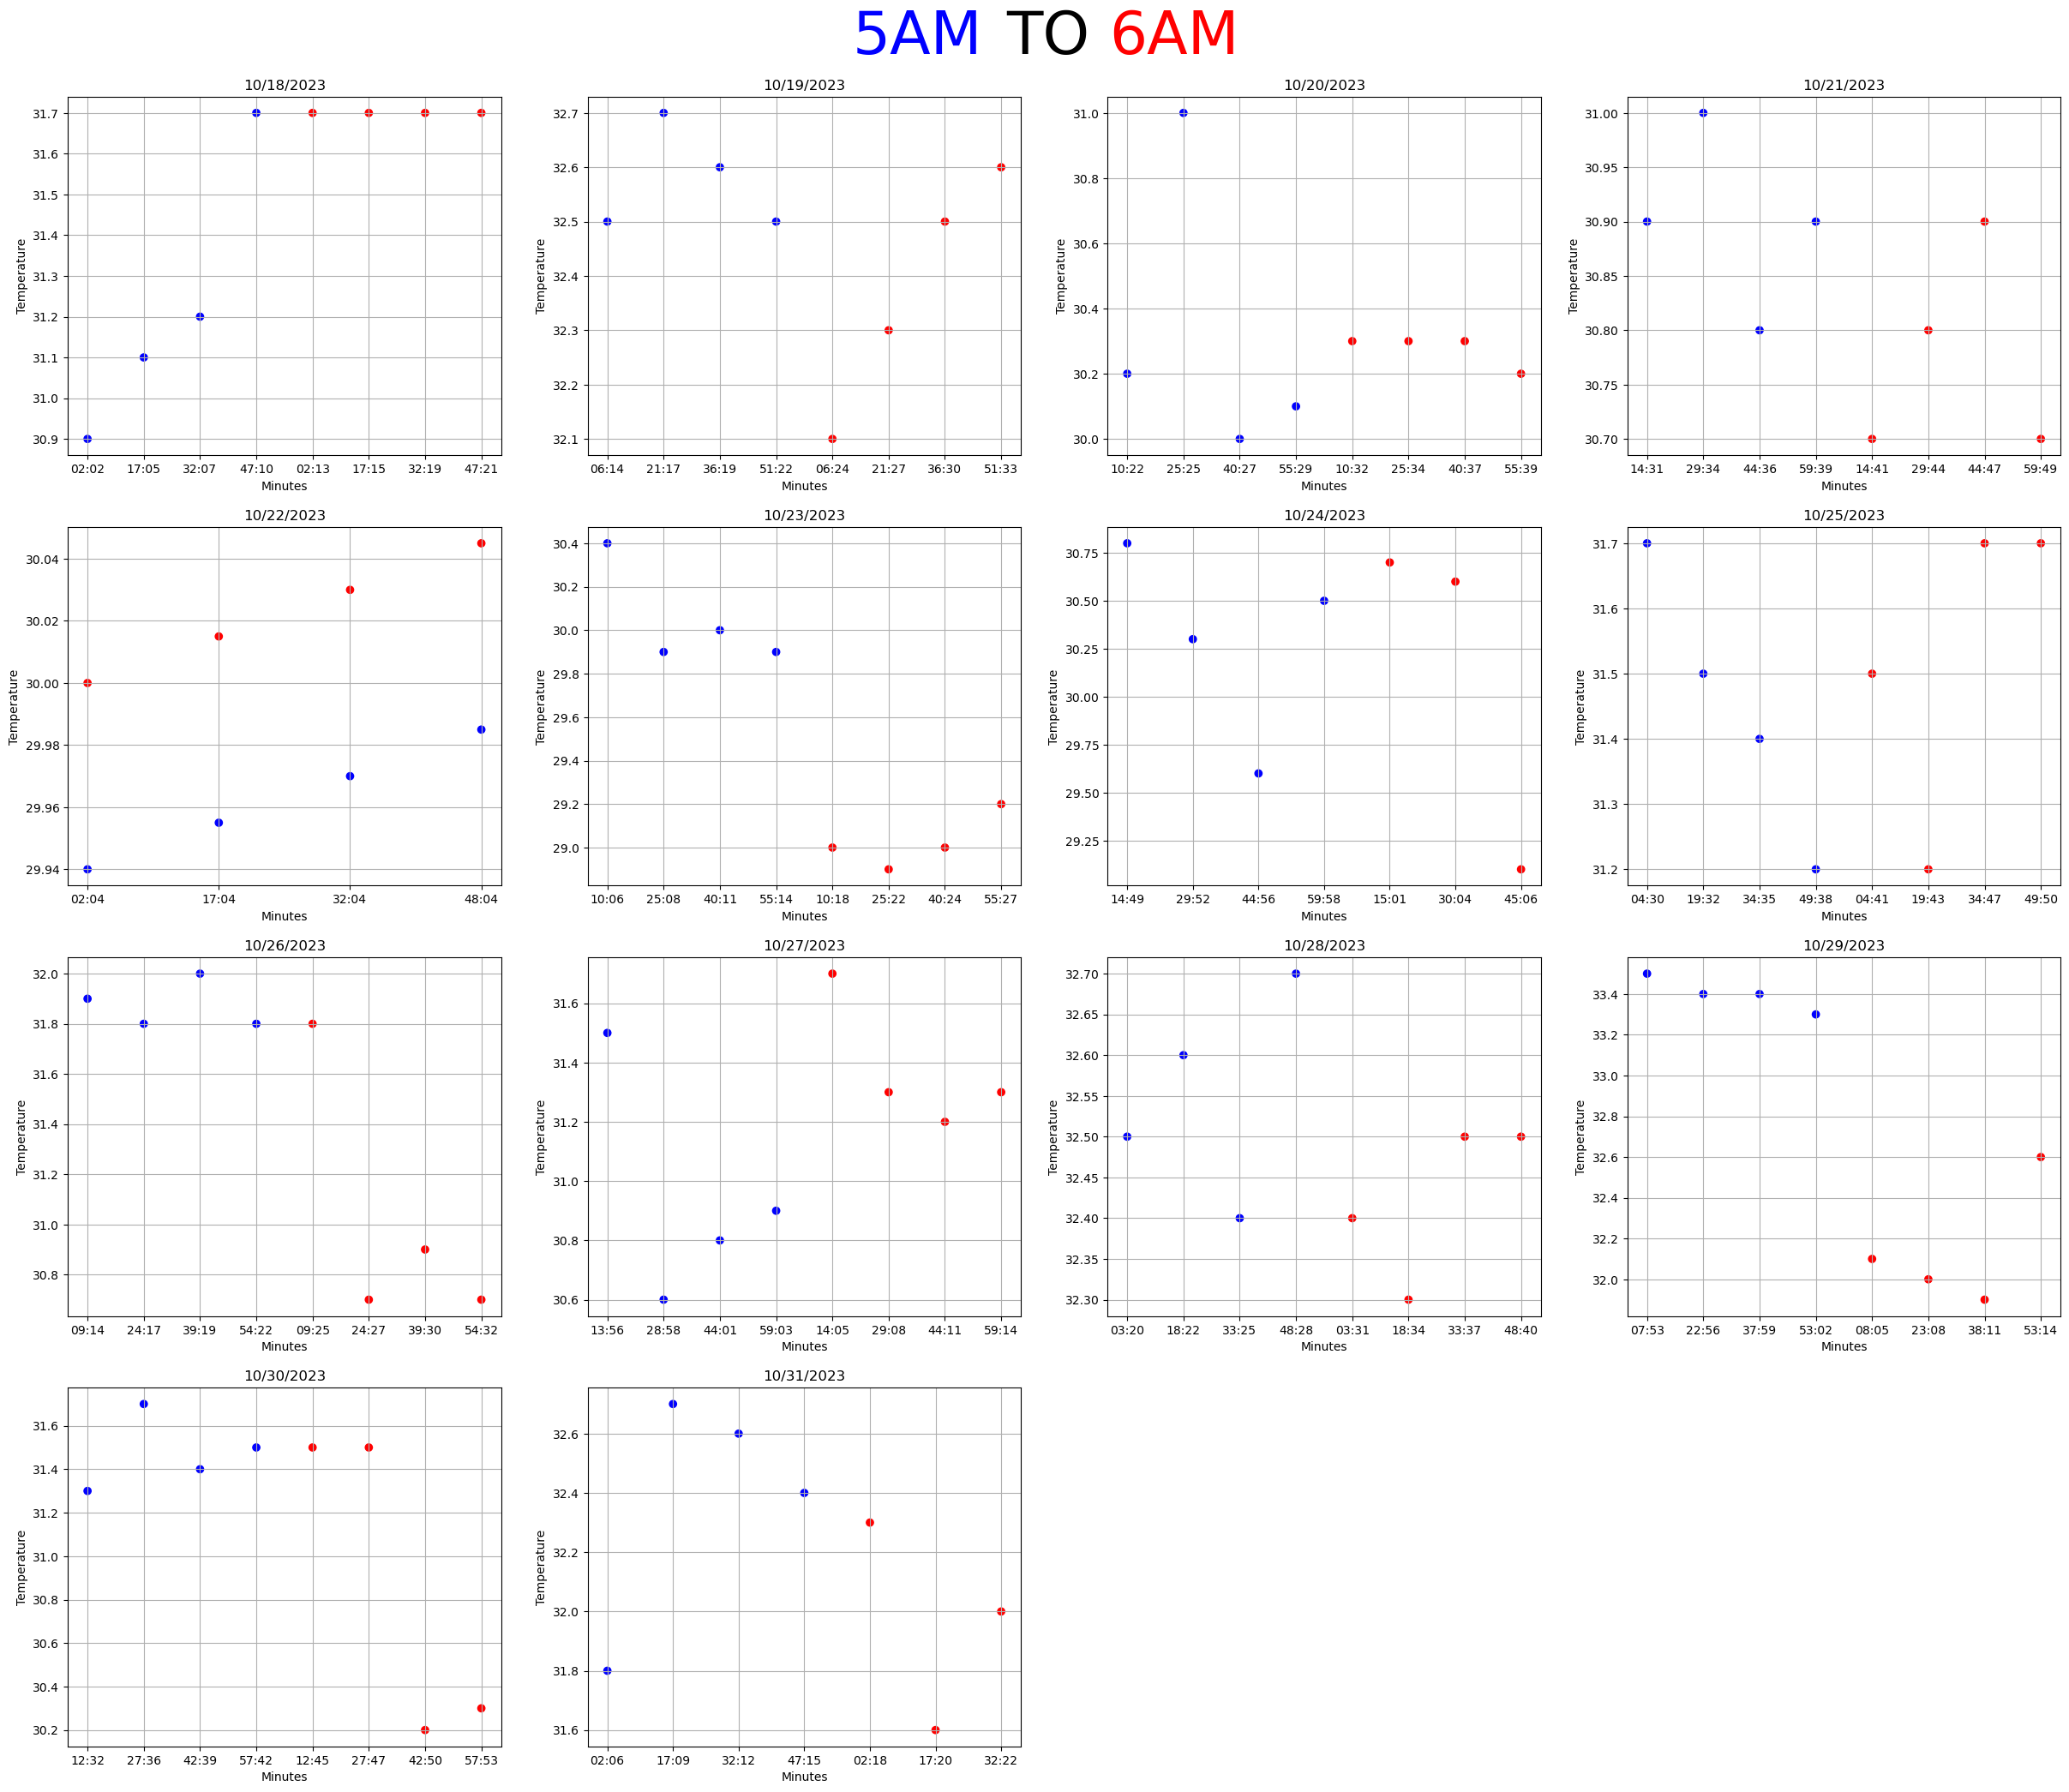

In [5]:
plotFilteredData('5AM TO 6AM', getFilteredData(indexesOf5AMTo6AM, datetemphumiDF))
plotFilteredDataPerDay('5AM TO 6AM', getFilteredData(indexesOf5AMTo6AM, datetemphumiDF))

### FILTER 1PM TO 2PM

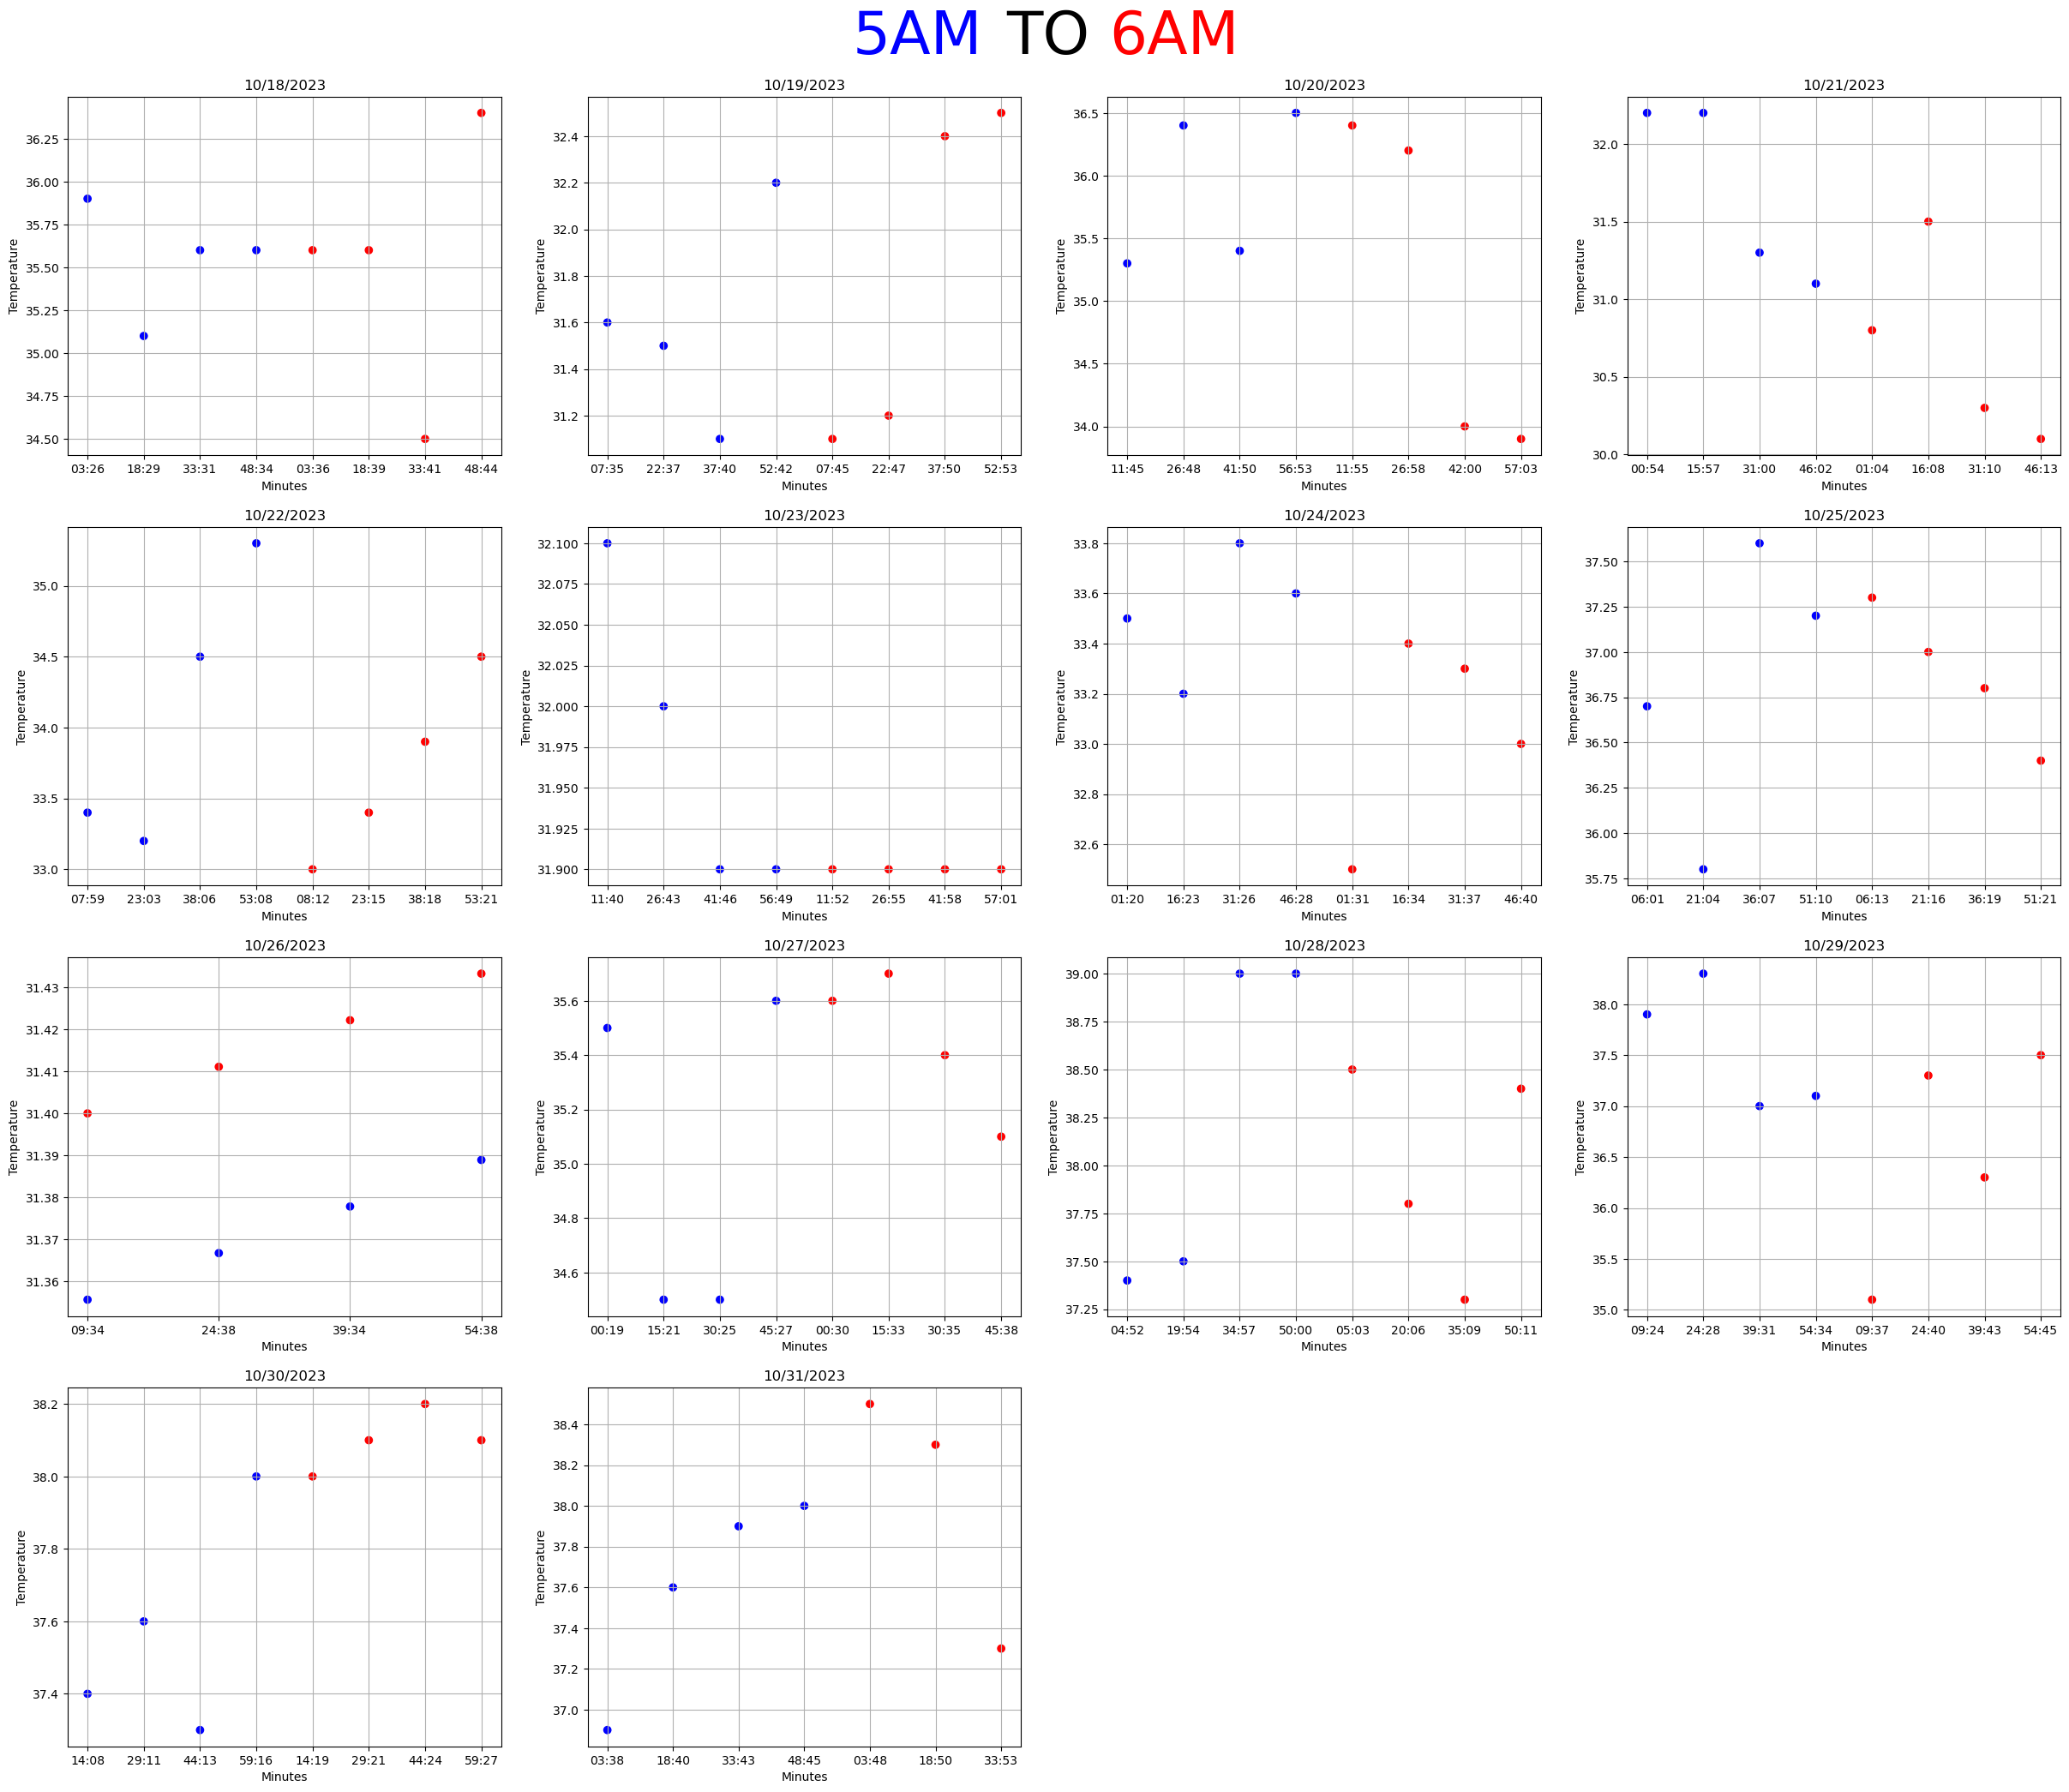

In [6]:
plotFilteredData('5AM TO 6AM', getFilteredData(indexesOf1PMTo2PM, datetemphumiDF))
plotFilteredDataPerDay('5AM TO 6AM', getFilteredData(indexesOf1PMTo2PM, datetemphumiDF))

### FILTER 10PM TO 11PM

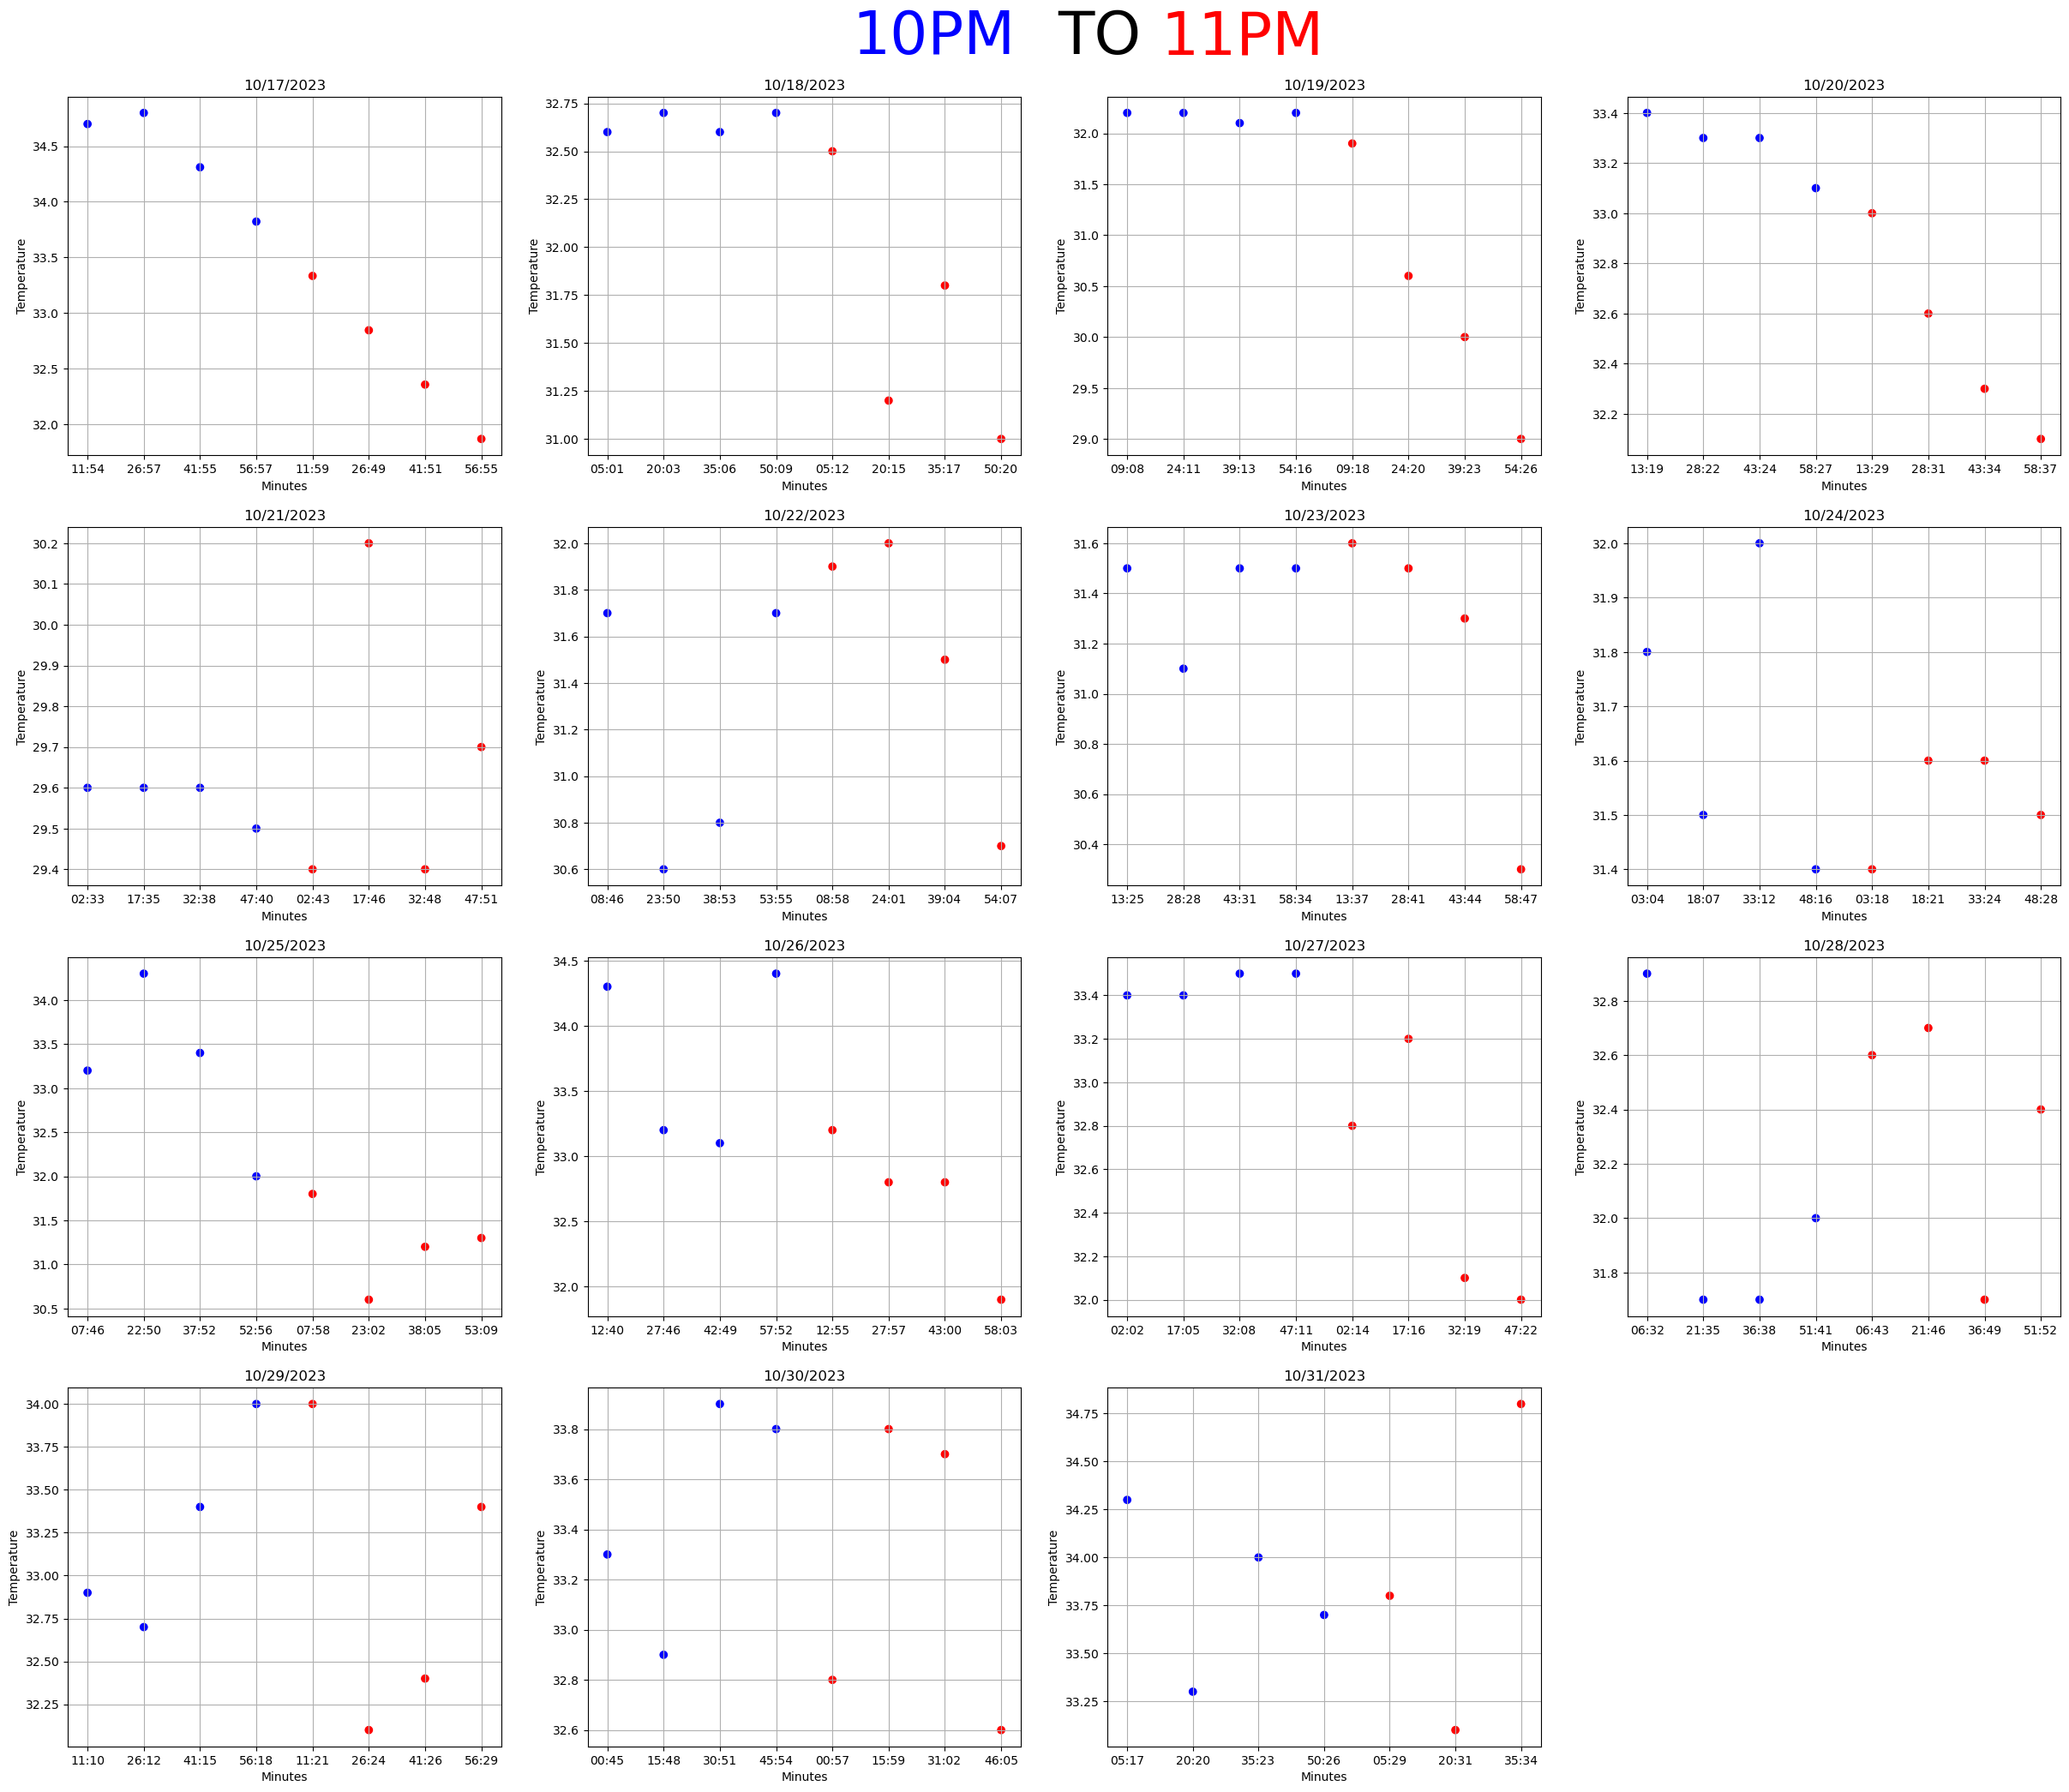

In [7]:
plotFilteredData('10PM TO 11PM', getFilteredData(indexesOf10PMTo11PM, datetemphumiDF))
plotFilteredDataPerDay('10PM TO 11PM', getFilteredData(indexesOf10PMTo11PM, datetemphumiDF))

### mema


In [8]:
def getFilteredData(indexesOfTargets, datetemphumiDF):
    indexesOfTargetsPerDay = []
    tempOfTargetsPerDay = []
    humiOfTargetsPerDay = []
    datesOfTargets = []
    minutesOfTargets = []

    tempList = []
    temperatures = []
    humidity = []
    datesList = []
    prevDate = None

    lastIndexFromIndexesOfTargets= indexesOfTargets[-1]
    lastElement = datetemphumiDF['Date'][lastIndexFromIndexesOfTargets]
    
    minutesList = []

    for indx in indexesOfTargets:
        dateTimeSplit = datetemphumiDF['Date'][indx].split('_')
        dateSplit = dateTimeSplit[0].split('/')
        date = dateSplit[1]
        datetimeFromDF = dateDF['Date'][indx]
        timeSplit = dateTimeSplit[1].split(':')
        time = timeSplit[1] + ":" + timeSplit[2]
        
        if (date != prevDate and prevDate != None) or datetimeFromDF == lastElement:
            indexesOfTargetsPerDay.append(tempList)
            tempOfTargetsPerDay.append(temperatures)
            humiOfTargetsPerDay.append(humidity)
            datesOfTargets.append(datesList)
            minutesOfTargets.append(minutesList)
            
            tempList = []
            temperatures = []
            humidity = []
            datesList = []
            minutesList = []
        
        tempList.append(indx)
        temperatures.append(datetemphumiDF['Temperature (°C)'][indx])
        humidity.append(datetemphumiDF['Humidity (%)'][indx])
        datesList.append(datetimeFromDF)
        minutesList.append(time)
        
        prevDate = date
        
    return zip(tempOfTargetsPerDay, datesOfTargets, minutesOfTargets)
    
def plotFilteredData(title, filteredData):
    plt.figure(figsize=(25,5), dpi=900, layout='tight')

    plt.title(title)
    plt.ylabel("TEMPERATURE")
    plt.xlabel("DATE AND TIME")

    for item, date in filteredData:
        dateLabel = date[0].split('/')[1]
        plt.subplot.scatter(date, item, label=f'Oct{dateLabel}')

    plt.setp(plt.xticks(fontsize=7))
    plt.gcf().autofmt_xdate()
    plt.legend()
    plt.grid()
    plt.show()

In [9]:
indexesOfTargetsPerDay = []
tempOfTargetsPerDay = []
humiOfTargetsPerDay = []
datesOfTargets = []

tempList = []
temperatures = []
humidity = []
datesList = []
prevDate = None

lastIndexFromIndexesOfTargets= indexesOf5AMTo6AM[-1]
lastElement = datetemphumiDF['Date'][lastIndexFromIndexesOfTargets]

minutesList = []

for indx in indexesOf5AMTo6AM:
    dateTimeSplit = datetemphumiDF['Date'][indx].split('_')
    dateSplit = dateTimeSplit[0].split('/')
    date = dateSplit[1]
    datetimeFromDF = dateDF['Date'][indx]
    timeSplit = dateTimeSplit[1].split(':')
    time = timeSplit[1] + ":" + timeSplit[2]
    
    if (date != prevDate and prevDate != None) or datetimeFromDF == lastElement:
        indexesOfTargetsPerDay.append(tempList)
        tempOfTargetsPerDay.append(temperatures)
        humiOfTargetsPerDay.append(humidity)
        datesOfTargets.append(datesList)
        
        tempList = []
        temperatures = []
        humidity = []
        datesList = []
    
    tempList.append(indx)
    temperatures.append(datetemphumiDF['Temperature (°C)'][indx])
    humidity.append(datetemphumiDF['Humidity (%)'][indx])
    datesList.append(time)

    prevDate = date
    
print(datesOfTargets)




[['02:02', '17:05', '32:07', '47:10', '02:13', '17:15', '32:19', '47:21'], ['06:14', '21:17', '36:19', '51:22', '06:24', '21:27', '36:30', '51:33'], ['10:22', '25:25', '40:27', '55:29', '10:32', '25:34', '40:37', '55:39'], ['14:31', '29:34', '44:36', '59:39', '14:41', '29:44', '44:47', '59:49'], ['02:04', '17:04', '32:04', '48:04', '02:04', '17:04', '32:04', '48:04'], ['10:06', '25:08', '40:11', '55:14', '10:18', '25:22', '40:24', '55:27'], ['14:49', '29:52', '44:56', '59:58', '15:01', '30:04', '45:06'], ['04:30', '19:32', '34:35', '49:38', '04:41', '19:43', '34:47', '49:50'], ['09:14', '24:17', '39:19', '54:22', '09:25', '24:27', '39:30', '54:32'], ['13:56', '28:58', '44:01', '59:03', '14:05', '29:08', '44:11', '59:14'], ['03:20', '18:22', '33:25', '48:28', '03:31', '18:34', '33:37', '48:40'], ['07:53', '22:56', '37:59', '53:02', '08:05', '23:08', '38:11', '53:14'], ['12:32', '27:36', '42:39', '57:42', '12:45', '27:47', '42:50', '57:53'], ['02:06', '17:09', '32:12', '47:15', '02:18', 

In [10]:
# plotFilteredData('1PM TO 2PM', getFilteredData(indexesOf1PMTo2PM, datetemphumiDF))



